In [142]:
import pandas as pd
import numpy as np

In [143]:
data = pd.read_excel('Training Data Dump.xlsx')

In [144]:
data.head(3)

,Lead_ID,F2,F3,F4,F5,F7,F8,F9,F10,F11,...,F108,F109,F110,F111,F112,F113,F114,F115,F117,Label
0,197056838,NaT,2024-09-22 08:05:00,NaN,1.0,25517.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,12261,NaN,0,0
1,197056839,NaT,2024-09-22 08:05:00,NaN,2.0,25517.0,1,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,11852,NaN,0,0
2,197057485,NaT,2024-09-22 08:13:00,NaN,3.0,25511.0,1,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,16942,NaN,0,0


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 115 entries, Lead_ID to Label
dtypes: datetime64[ns](2), float64(74), int64(39)
memory usage: 8.8 MB


In [146]:
data.isnull().sum()

Lead_ID       0
F2         8830
F3            0
F4         8834
F5         1277
           ... 
F113       9982
F114          0
F115       9959
F117          0
Label         0
Length: 115, dtype: int64

In [147]:
threshold = 0.6 * len(data)
data = data.dropna(axis=1, thresh=len(data) - threshold)


In [148]:
null_counts = data.isnull().sum().sort_values(ascending = 
                                False)

In [149]:
null_counts[null_counts>0]

F27     4766
F20     4149
F19     3181
F58     2639
F5      1277
F52      981
F50      979
F49      975
F51      975
F102     973
F53      973
F91      973
F55      973
F101     973
F104     973
F105     973
F100     973
F93      973
F103     973
F18      973
F92      973
F7       166
F43       21
F42       15
F40       15
F41        6
F34        5
F31        3
F33        3
F32        2
dtype: int64

In [150]:
# Separating numerical and datetime columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
datetime_cols = data.select_dtypes(include=['datetime64']).columns

numerical_df = data[numerical_cols]
datetime_df = data[datetime_cols]


In [151]:
# Filling missing values in numerical columns with mean
numerical_df = numerical_df.fillna(numerical_df.mean())


In [152]:
# Filling missing datetime values with forward fill
datetime_df = datetime_df.fillna(method='ffill')


C:\Users\rajka\AppData\Local\Temp\ipykernel_3944\427057818.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datetime_df = datetime_df.fillna(method='ffill')


In [153]:
# Combine the processed DataFrames
data = pd.concat([numerical_df, datetime_df], axis=1)


In [154]:
null_counts = data.isnull().sum().sort_values(ascending = 
                                False)
null_counts[null_counts>0]

Series([], dtype: int64)

In [155]:
data.head(3)

,Lead_ID,F5,F7,F8,F9,F10,F11,F12,F13,F15,...,F100,F101,F102,F103,F104,F105,F114,F117,Label,F3
0,197056838,1.0,25517.0,1,1,0,0,0.0,0.0,0,...,4.0,9.0,6.0,4.0,9.0,6.0,12261,0,0,2024-09-22 08:05:00
1,197056839,2.0,25517.0,1,2,1,0,0.0,0.0,0,...,0.0,6.0,8.0,0.0,6.0,8.0,11852,0,0,2024-09-22 08:05:00
2,197057485,3.0,25511.0,1,2,2,0,0.0,0.0,0,...,4.0,7.0,4.0,4.0,7.0,4.0,16942,0,0,2024-09-22 08:13:00


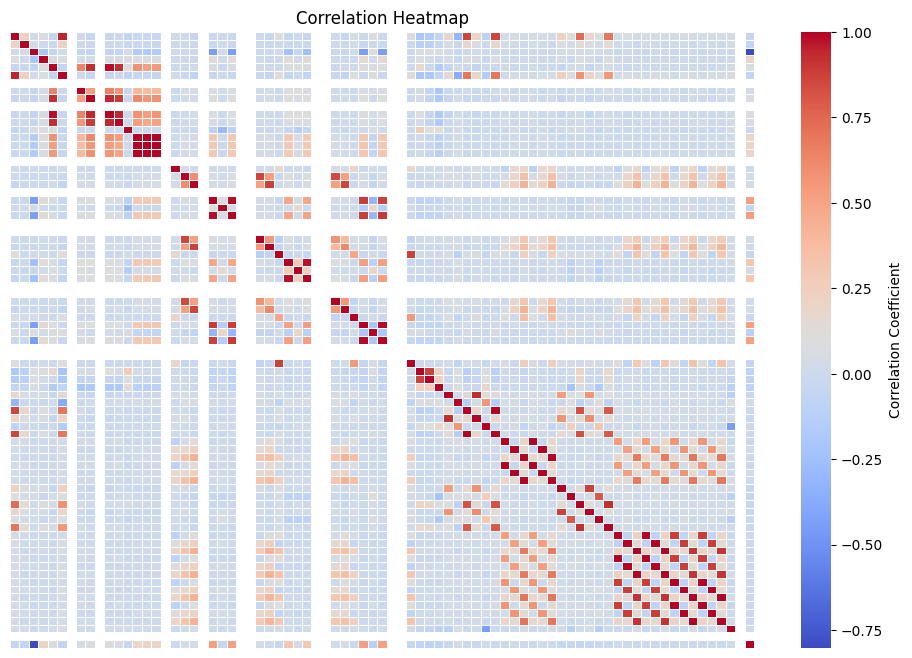

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'}, 
            xticklabels=False, yticklabels=False)
plt.title('Correlation Heatmap')
plt.show()


In [157]:
summary_stats = data.describe()
print(summary_stats)


            Lead_ID            F5            F7            F8            F9  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   2.003409e+08     59.435745  23749.615518      2.163000      3.947200   
min    1.970567e+08      1.000000     64.000000      1.000000      1.000000   
25%    1.986569e+08      2.000000  25512.000000      2.000000      1.000000   
50%    2.009292e+08     32.000000  25516.000000      2.000000      3.000000   
75%    2.019331e+08     88.000000  25517.000000      2.000000      4.000000   
max    2.030413e+08    385.000000  34158.000000     24.000000    100.000000   
std    1.875632e+06     74.442361   6624.407889      1.820264      7.233633   

                F10      F11           F12           F13      F15  ...  \
count  10000.000000  10000.0  10000.000000  10000.000000  10000.0  ...   
mean    2912.402400      0.0      3.911019      1.267598      0.0  ...   
min        0.000000      0.0      0.000000      0.000000      0.0 

In [158]:

# Extract year, month, and day from F3
data['F3_year'] = data['F3'].dt.year
data['F3_month'] = data['F3'].dt.month
data['F3_day'] = data['F3'].dt.day

# Drop the original datetime column as it's no longer needed
data.drop(['F3'], axis=1, inplace=True)


In [159]:
data.head(3)

,Lead_ID,F5,F7,F8,F9,F10,F11,F12,F13,F15,...,F102,F103,F104,F105,F114,F117,Label,F3_year,F3_month,F3_day
0,197056838,1.0,25517.0,1,1,0,0,0.0,0.0,0,...,6.0,4.0,9.0,6.0,12261,0,0,2024,9,22
1,197056839,2.0,25517.0,1,2,1,0,0.0,0.0,0,...,8.0,0.0,6.0,8.0,11852,0,0,2024,9,22
2,197057485,3.0,25511.0,1,2,2,0,0.0,0.0,0,...,4.0,4.0,7.0,4.0,16942,0,0,2024,9,22


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 82 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lead_ID   10000 non-null  int64  
 1   F5        10000 non-null  float64
 2   F7        10000 non-null  float64
 3   F8        10000 non-null  int64  
 4   F9        10000 non-null  int64  
 5   F10       10000 non-null  int64  
 6   F11       10000 non-null  int64  
 7   F12       10000 non-null  float64
 8   F13       10000 non-null  float64
 9   F15       10000 non-null  int64  
 10  F18       10000 non-null  float64
 11  F19       10000 non-null  float64
 12  F20       10000 non-null  float64
 13  F23       10000 non-null  int64  
 14  F24       10000 non-null  int64  
 15  F25       10000 non-null  float64
 16  F26       10000 non-null  int64  
 17  F27       10000 non-null  float64
 18  F28       10000 non-null  float64
 19  F29       10000 non-null  float64
 20  F30       10000 non-null  int

In [161]:
data.isnull().sum().info()

<class 'pandas.core.series.Series'>
Index: 82 entries, Lead_ID to F3_day
Series name: None
Non-Null Count  Dtype
--------------  -----
82 non-null     int64
dtypes: int64(1)
memory usage: 3.3+ KB


In [162]:
# Convert all columns to float (if possible)
data = data.apply(pd.to_numeric, errors='coerce')

print(data.isna().sum())  # To see if any missing values have appeared


Lead_ID     0
F5          0
F7          0
F8          0
F9          0
           ..
F117        0
Label       0
F3_year     0
F3_month    0
F3_day      0
Length: 82, dtype: int64


In [163]:

X = data.drop('Label', axis=1)  # Features
y = data['Label']  # Target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [164]:
# Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
# Best Cross-validation Score (Negative MSE): -0.0032624670291469733
# Test Score (R^2): 0.9543307644155279

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_

test_accuracy = model.score(X_test, y_test)
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\rajka\miniforge3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
493 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rajka\miniforge3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rajka\miniforge3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\rajka\miniforge3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\rajka\miniforge3\Lib\site

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9985


Text(0.5, 1.0, 'Confusion Matrix')

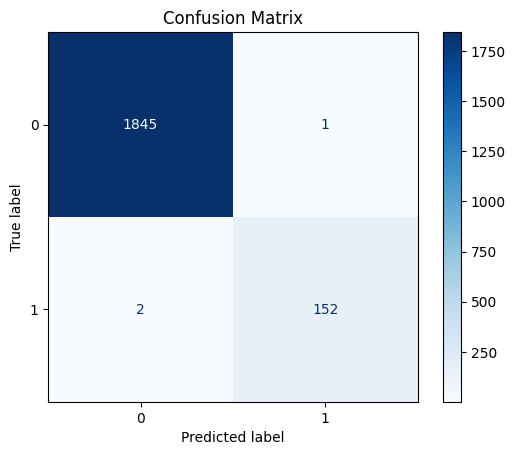

In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title('Confusion Matrix')


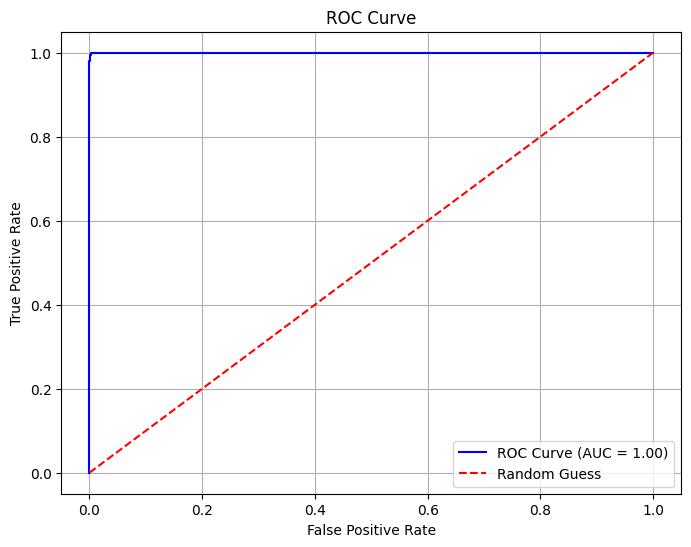

In [167]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


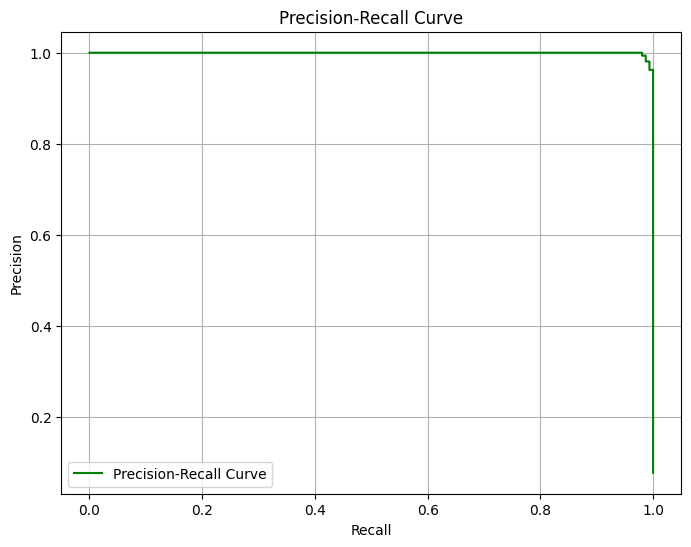

In [169]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


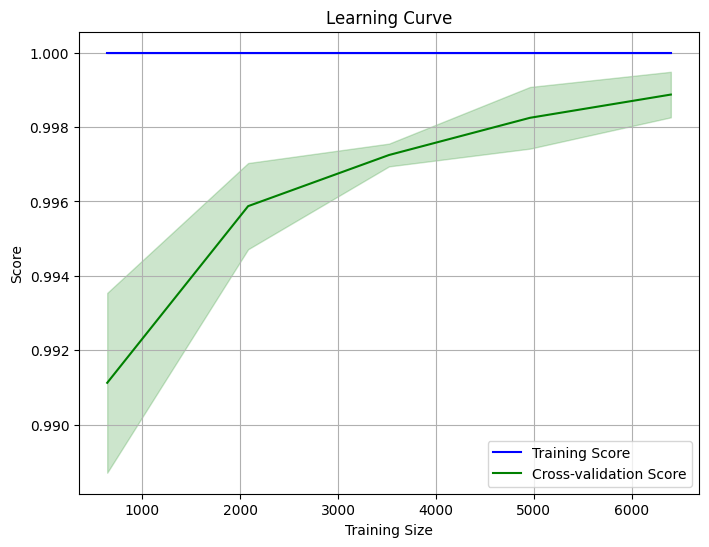

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, color='green', label='Cross-validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


In [172]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss, roc_curve

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")


# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc}")




Accuracy: 0.9985
Precision: 0.9934640522875817
Recall: 0.987012987012987
F1-Score: 0.990228013029316
ROC-AUC: 0.9932356376018348


In [173]:
import pandas as pd
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Value': [0.9985, 0.9934640522875817, 0.987012987012987, 0.990228013029316, 0.9932356376018348]
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


      Metric     Value
0   Accuracy  0.998500
1  Precision  0.993464
2     Recall  0.987013
3   F1-Score  0.990228
4    ROC-AUC  0.993236
